In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../../")
import setigen as stg

In [2]:
fn = '/datax/users/eenriquez/voyager_test/blc07_guppi_57650_67573_Voyager1_0002.gpuspec.0000.fil'

In [3]:
fil = Waterfall(fn, f_start=8419.295951, f_stop=8419.298110)

/datax/users/eenriquez/voyager_test/blc07_guppi_57650_67573_Voyager1_0002.gpuspec.0000.fil


OSError: No such file or directory: /datax/users/eenriquez/voyager_test/blc07_guppi_57650_67573_Voyager1_0002.gpuspec.0000.fil

In [4]:
fil.header

NameError: name 'fil' is not defined

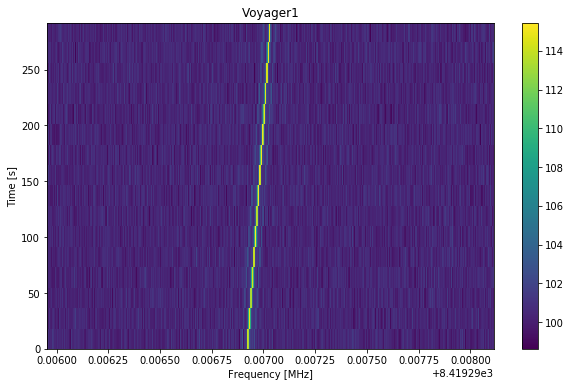

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall(logged=True)

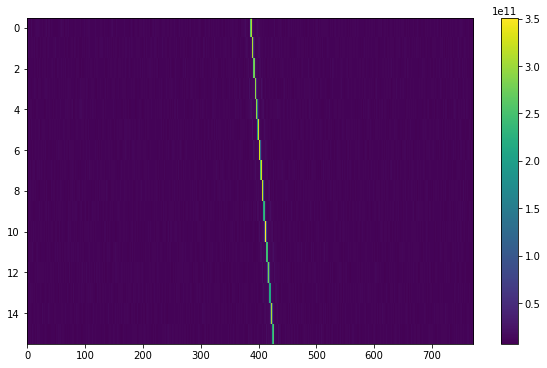

In [39]:
plt.figure(figsize=(10,6))
fil_data = np.squeeze(fil.data)
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

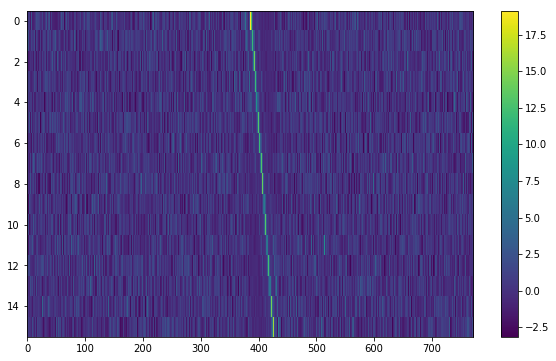

In [44]:
# def normalize(data, exclude=0.1):
#     mean = np.mean(data)
#     std = np.std(data)
#     data = np.nan_to_num((data-mean)/std)
#     return data

def db(x):
    """ Convert linear to dB """
    return 10*np.log10(x)

def normalize(data, exclude=0.1):
    t_len, f_len = data.shape
    mean = np.empty(f_len)
    std = np.empty(f_len)
    data = db(data)
    for i in np.arange(f_len):
        noise_data = np.sort(data[:,i])[0:int(np.ceil(t_len*(1 - exclude)))]
        mean[i] = np.mean(noise_data)
        std[i] = np.std(noise_data)
    return np.nan_to_num((data - mean) / std)

plt.figure(figsize=(10,6))
fil_data = normalize(np.squeeze(fil.data))
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

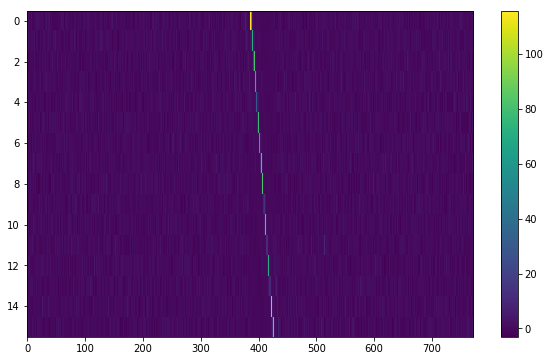

In [51]:
# def normalize(data, exclude=0.1):
#     mean = np.mean(data)
#     std = np.std(data)
#     data = np.nan_to_num((data-mean)/std)
#     return data

def db(x):
    """ Convert linear to dB """
    return 10*np.log10(x)

def normalize(data, exclude=0.1):
    t_len, f_len = data.shape
    mean = np.empty(f_len)
    std = np.empty(f_len)
    for i in np.arange(f_len):
        noise_data = np.sort(data[:,i])[0:int(np.ceil(t_len*(1 - exclude)))]
        mean[i] = np.mean(noise_data)
        std[i] = np.std(noise_data)
    return np.nan_to_num((data - mean) / std)

plt.figure(figsize=(10,6))
fil_data = normalize(np.squeeze(fil.data))
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

In [ ]:
# def normalize(data, exclude=0.1):
#     mean = np.mean(data)
#     std = np.std(data)
#     data = np.nan_to_num((data-mean)/std)
#     return data

def db(x):
    """ Convert linear to dB """
    return 10*np.log10(x)

def normalize(data, cols=0, exclude=0.0):
    t_len, f_len = data.shape
    mean = np.empty(f_len)
    std = np.empty(f_len)
    data = db(data)
    for i in np.arange(f_len):
        if i < cols:
            start = 0
        else:
            start = i - cols
        if i > f_len - 1 - cols:
            end = f_len
        else:
            end = i + cols + 1
        noise_data = np.sort(data[:,start:end].flatten())[0:int(np.ceil(t_len*(1 - exclude)))]
        mean[i] = np.mean(noise_data)
        std[i] = np.std(noise_data)
    return np.nan_to_num((data - mean) / std)

plt.figure(figsize=(10,6))
fil_data = normalize(np.squeeze(fil.data), cols = 2**8, exclude = 0.15)
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

In [ ]:
# def normalize(data, exclude=0.1):
#     mean = np.mean(data)
#     std = np.std(data)
#     data = np.nan_to_num((data-mean)/std)
#     return data
from astropy.stats import median_absolute_deviation

def db(x):
    """ Convert linear to dB """
    return 10*np.log10(x)

def normalize(data, cols=0, exclude=0.0):
    t_len, f_len = data.shape
    mean = np.empty(f_len)
    std = np.empty(f_len)
    data = db(data)
    for i in np.arange(f_len):
        if i < cols:
            start = 0
        else:
            start = i - cols
        if i > f_len - 1 - cols:
            end = f_len
        else:
            end = i + cols + 1
        noise_data = np.sort(data[:,start:end].flatten())[0:int(np.ceil(t_len*(1 - exclude)))]
        mean[i] = np.median(noise_data)
        std[i] = median_absolute_deviation(noise_data)
    return np.nan_to_num((data - mean) / std)

plt.figure(figsize=(10,6))
fil_data = normalize(np.squeeze(fil.data), cols = 0, exclude = 0.0)
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

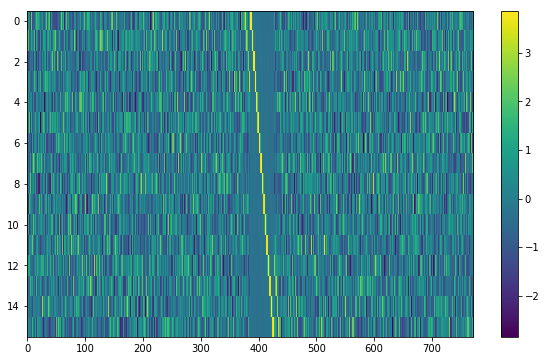

In [43]:
def normalize(data):
    mean = np.mean(data, axis = 0, keepdims=True)
    std = np.std(data, axis = 0, keepdims=True)
    data = np.nan_to_num((data-mean)/std)
    return data

plt.figure(figsize=(10,6))
fil_data = normalize(np.squeeze(fil.data))
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

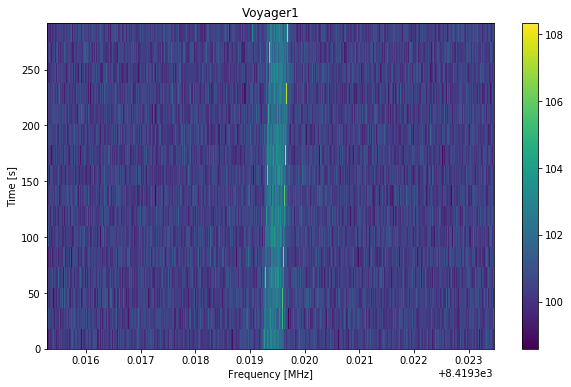

In [29]:
fil = Waterfall(fn, f_start=8419.315292, f_stop=8419.323450)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall()

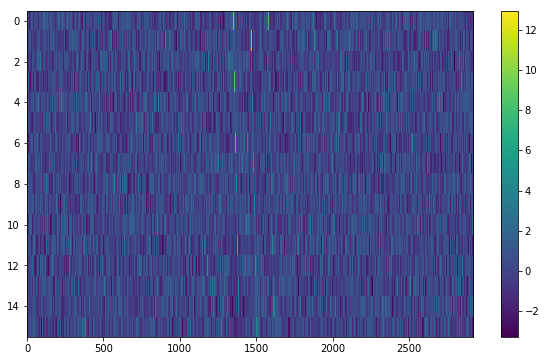

In [31]:
plt.figure(figsize=(10,6))
fil_data = normalize(np.squeeze(fil.data))
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

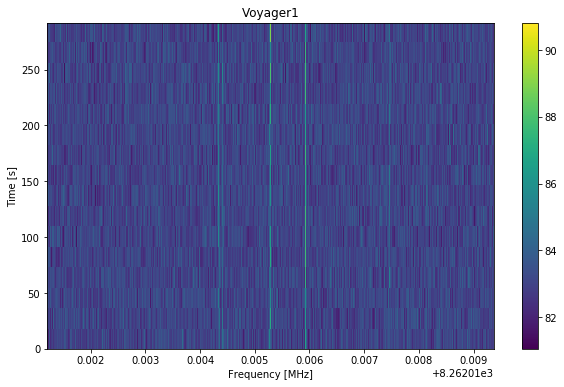

In [37]:
fil = Waterfall(fn, f_start=8262.011204, f_stop=8262.019363)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall(logged=True)


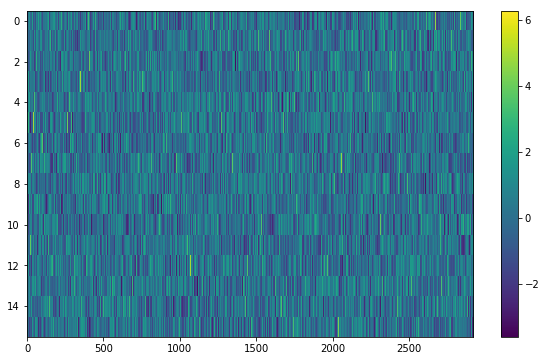

In [33]:
plt.figure(figsize=(10,6))
fil_data = normalize(np.squeeze(fil.data))
plt.imshow(fil_data, aspect='auto')
plt.colorbar()

In [48]:
import numpy as np 
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [2,2])
noise

array([[-0.03536777, -0.17313582],
       [ 0.05637046, -0.01295947]])